In [1]:
# Load, summarize & explore the dataset
import pandas as pd
from pandas import read_csv 
import numpy as np
from numpy import nan
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 
import matplotlib.mlab as mlab
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None 

In [2]:
# load the dataset
d = read_csv('medicare-part-d-opioid-prescriber-summary-file-2016-1.csv')

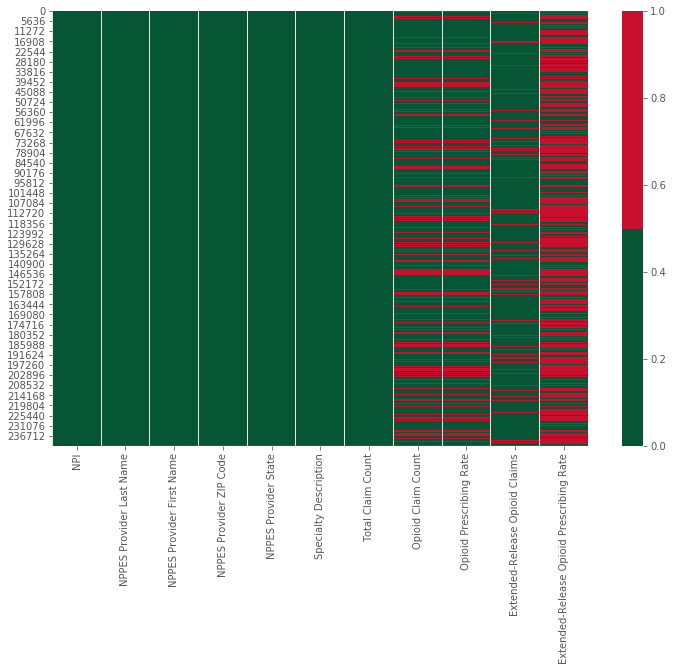

In [3]:
# find missing data with a heatmap
# good option with less features
cols = d.columns[:11] # The 11 is here because there are 11 columns in this dataset 
colors = ['#065535', '#c8102e'] # 1st hex = green for otherwise; 2nd hex = red for missing
sns.heatmap(d[cols].isnull(), cmap=sns.color_palette(colors))

# The heatmap above demonstrates the missing data pattern of all 11 features 
# Horizontal axis shows feature name
# Vertical axis shows number of observations 
# Again, the red hex shows missing data, and the green hex shows otherwise
# For example, 'Extended-Release Opioid Claims' column has missing values throughout many rows

In [4]:
# finding missing data: data percentage list 
# heatmaps can be complemented with data percentage lists  
for col in d.columns:
    pct_missing = np.mean(d[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

NPI - 0.0%
NPPES Provider Last Name - 0.0%
NPPES Provider First Name - 0.0%
NPPES Provider ZIP Code - 0.0%
NPPES Provider State - 0.0%
Specialty Description - 0.0%
Total Claim Count - 0.0%
Opioid Claim Count - 28.0%
Opioid Prescribing Rate - 28.0%
Extended-Release Opioid Claims - 11.0%
Extended-Release Opioid Prescribing Rate - 66.0%


In [5]:
# managing missing data: histograms
# good technique when you have many features
# learn more abut missing value patterns among observations
# first step: create missing indicator for features with missing data points
for col in d.columns:
    missing = d[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:
        print('created missing indicator for: {}'.format(col))
        d['{}_ismissing'.format(col)] = missing

created missing indicator for: NPPES Provider Last Name
created missing indicator for: NPPES Provider First Name
created missing indicator for: NPPES Provider ZIP Code
created missing indicator for: NPPES Provider State
created missing indicator for: Specialty Description
created missing indicator for: Total Claim Count
created missing indicator for: Opioid Claim Count
created missing indicator for: Opioid Prescribing Rate
created missing indicator for: Extended-Release Opioid Claims
created missing indicator for: Extended-Release Opioid Prescribing Rate


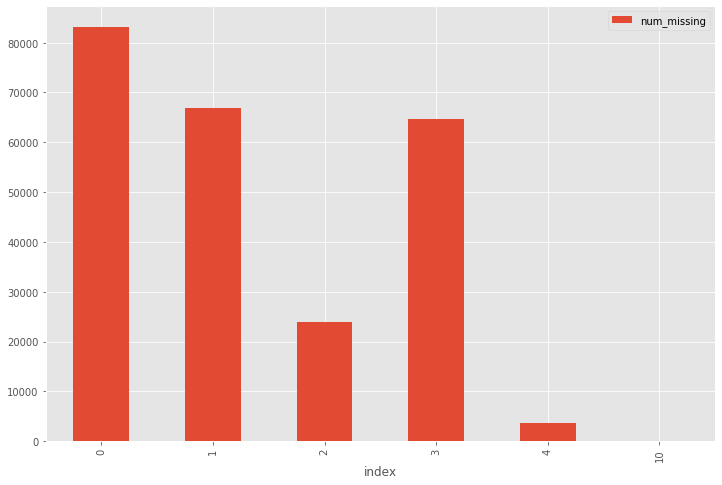

In [6]:
# based on the indicator, you can now plot the histogram of missing values
# the histogram helps identify missing value situations among the 242,335 observations 
# for example, there are over 80,000 observations with no missing values & close to 25,000 with 2 missing values
# there's no agreed upon solution in dealing with missing data; it depends on your dataset & goals

ismissing_cols = [col for col in d.columns if 'ismissing' in col]
d['num_missing'] = d[ismissing_cols].sum(axis=1)
d['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [7]:
# example: looking into numerical column 'Opioid Claim Count' 
d['Opioid Claim Count'].describe()

count    174115.000000
mean         95.640646
std         314.619917
min           0.000000
25%           0.000000
50%          19.000000
75%          69.000000
max       16045.000000
Name: Opioid Claim Count, dtype: float64

In [8]:
# replace non-numeric missing values & create missing value indicator variables for each column 
# you can also impute the missing value in categorical features by replacing missing data with most frequent values
d_non_numeric = d.select_dtypes(exclude=[np.number])
non_numeric_cols = d_non_numeric.columns.values
for col in non_numeric_cols:
    missing = d[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0: # only do this for columns with missing values
        print('missing {}'.format(col))
        d['{}_ismissing'.format(col)] = missing 

missing NPPES Provider Last Name
missing NPPES Provider First Name
missing NPPES Provider State
missing Specialty Description
missing Opioid Prescribing Rate
missing Extended-Release Opioid Prescribing Rate


In [9]:
# replacing numeric missing values & create missing value indicator variables for numeric data
# you can also use dropna() to remove columns or rows with missing data 
# you can also use simpleimputer from scikitlearn (running directly on numpy instead of the df) to replace missing numeric values with something other than NaN
d_numeric = d.select_dtypes(include=[np.number])
numeric_cols = d_numeric.columns.values

for col in numeric_cols: 
    missing = d[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0: 
        print('missing {}'.format(col))
        d['{}_is missing'.format(col)] = missing
        med = d[col].median()
        d[col] = d[col].fillna(med)

missing NPPES Provider ZIP Code
missing Total Claim Count
missing Opioid Claim Count
missing Extended-Release Opioid Claims


In [ ]:
# next steps/other ideas: use scikitlearn's simpleimputer to transform the data
# use pipeline class alongside a k-fold cross validation
# apply best practices in missing data imputation to avoid data leakage 
# there are countless ways to clean, transform & identify missing data. these are just a handful of ideas
# your process is highly dependant upon the dataset you have & goals 